In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df['sex'] = df['sex'].map({'male': 1, 'female' : 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no' : 0})

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [4]:
df = pd.get_dummies(df, columns=['region'])
df.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
5,31,0,25.740,0,0,3756.62160,False,False,True,False
6,46,0,33.440,1,0,8240.58960,False,False,True,False
7,37,0,27.740,3,0,7281.50560,False,True,False,False
8,37,1,29.830,2,0,6406.41070,True,False,False,False
9,60,0,25.840,0,0,28923.13692,False,True,False,False


In [5]:
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.1 KB


In [7]:
df[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']] = \
df[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].astype(int)

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


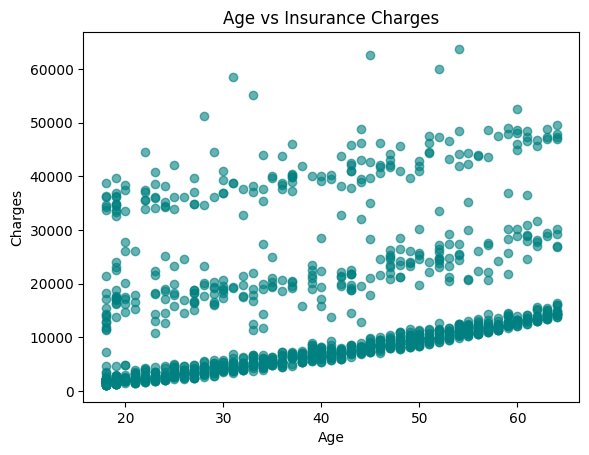

In [8]:
plt.scatter(df['age'], df['charges'], color='teal', alpha=0.6)
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


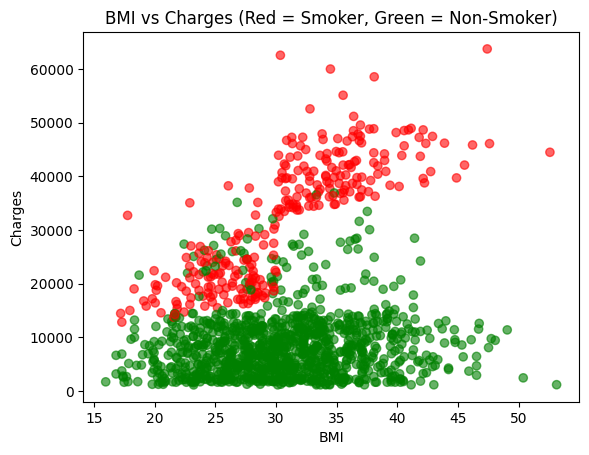

In [9]:
colors = df['smoker'].map({1: 'red', 0: 'green'})

plt.scatter(df['bmi'], df['charges'], c=colors, alpha=0.6)
plt.title('BMI vs Charges (Red = Smoker, Green = Non-Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


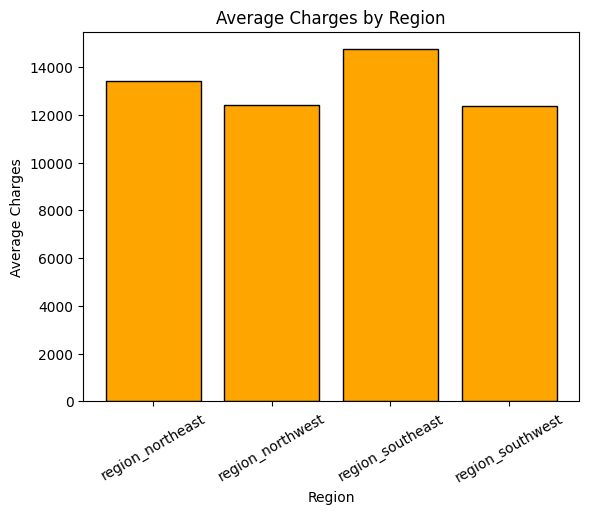

In [10]:
regions = ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
region_means = [df[df[r]==1]['charges'].mean() for r in regions]

plt.bar(regions, region_means, color='orange', edgecolor='black')
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=30)
plt.show()


In [11]:
df.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


In [13]:
df_test = df.copy()
df_test['age'] = (df_test['age']-df_test['age'].min())/(df_test['age'].max()-df_test['age'].min())
df_test['sex'] = (df_test['sex']-df_test['sex'].min())/(df_test['sex'].max()-df_test['sex'].min())
df_test['bmi'] = (df_test['bmi']-df_test['bmi'].min())/(df_test['bmi'].max()-df_test['bmi'].min())
df_test['children'] = (df_test['children']-df_test['children'].min())/(df_test['children'].max()-df_test['children'].min())
df_test['smoker'] = (df_test['smoker']-df_test['smoker'].min())/(df_test['smoker'].max()-df_test['smoker'].min())
df_test['charges'] = (df_test['charges']-df_test['charges'].min())/(df_test['charges'].max()-df_test['charges'].min())
df_test['region_northeast'] = (df_test['region_northeast']-df_test['region_northeast'].min())/(df_test['region_northeast'].max()-df_test['region_northeast'].min())
df_test['region_northwest'] = (df_test['region_northwest']-df_test['region_northwest'].min())/(df_test['region_northwest'].max()-df_test['region_northwest'].min())
df_test['region_southeast'] = (df_test['region_southeast']-df_test['region_southeast'].min())/(df_test['region_southeast'].max()-df_test['region_southeast'].min())
df_test['region_southwest'] = (df_test['region_southwest']-df_test['region_southwest'].min())/(df_test['region_southwest'].max()-df_test['region_southwest'].min())
df_test.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.043816,0.0,1.0,0.0,0.0


In [14]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X.iloc[i], w)+b
        cost = cost+(f_wb_i-y.iloc[i])**2

    cost /= (2*m)
    return cost

In [15]:
x = df_test.drop('charges', axis=1) 
y = df_test['charges']

x = x.reset_index(drop=True)
y = y.reset_index(drop=True)


In [16]:
x.head()


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [18]:
w=np.zeros(x.shape[1])
b=0
cost = compute_cost(x, y, w, b)
print(f"Initial cost : {cost}")

Initial cost : 0.03747030376363364


In [19]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """

    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(x.iloc[i], w)+b) - y.iloc[i]
        for j in range(n):
            dj_dw[j] += err* x.iloc[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [20]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x, y, w, b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -0.1939158618698609
dj_dw at initial w,b: 
 [-0.10703996 -0.10350736 -0.08299296 -0.04563104 -0.10109746 -0.04748273
 -0.04379549 -0.05911602 -0.04352161]


In [21]:
def gradient_descent(x, y, w_in, b_in, alpha, itr):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      alpha (float)       : Learning rate
      itr (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    j_history = []
    w = w_in.copy()
    b = b_in

    for i in range(itr):
        dj_db, dj_dw = compute_gradient(x, y, w, b)
        w -= alpha*dj_dw
        b -= alpha*dj_db

        if i % 100 == 0 :
            j_history.append(compute_cost(x, y, w, b))

            print(f"Iteration {i:4d}: Cost {j_history[-1]}")

    return w, b, j_history

In [22]:
itr = 1000
alpha =0.1

w_final, b_final, j_hist = gradient_descent(x, y, w, b, alpha, itr)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 0.029480700919850295
Iteration  100: Cost 0.00564748029279297
Iteration  200: Cost 0.004929287725900786
Iteration  300: Cost 0.004792089318973124
Iteration  400: Cost 0.004735364051824182
Iteration  500: Cost 0.0047039584325243005
Iteration  600: Cost 0.004684705932616661
Iteration  700: Cost 0.004672468166224597
Iteration  800: Cost 0.004664589474402542
Iteration  900: Cost 0.004659494292073192
b,w found by gradient descent: -0.04,[ 0.18930156 -0.00207102  0.17896222  0.03727085  0.38030459 -0.00131957
 -0.00693106 -0.01510363 -0.01570758] 


In [23]:

x_min = df.drop('charges', axis=1).min()
x_max = df.drop('charges', axis=1).max()
y_min = df['charges'].min()
y_max = df['charges'].max()

def predict(x_rest, w_cal, b_cal):
    """
    Predict charges for raw (unnormalized) inputs using learned parameters.
    """
    
    x_normalized = (x_rest - x_min) / (x_max - x_min)

    
    y_norm = np.dot(x_normalized, w_cal) + b_cal

    
    y_predicted = y_norm * (y_max - y_min) + y_min
    return y_predicted


In [24]:

test_samples = pd.DataFrame([
    {
        'age': 25, 'sex': 0, 'bmi': 22.4, 'children': 0, 'smoker': 0,
        'region_northeast': 0, 'region_northwest': 0, 'region_southeast': 1, 'region_southwest': 0
    },
    {
        'age': 40, 'sex': 1, 'bmi': 29.8, 'children': 2, 'smoker': 1,
        'region_northeast': 1, 'region_northwest': 0, 'region_southeast': 0, 'region_southwest': 0
    },
    {
        'age': 55, 'sex': 1, 'bmi': 26.1, 'children': 3, 'smoker': 0,
        'region_northeast': 0, 'region_northwest': 1, 'region_southeast': 0, 'region_southwest': 0
    }
])


In [25]:
w_final, b_final


(array([ 0.18930156, -0.00207102,  0.17896222,  0.03727085,  0.38030459,
        -0.00131957, -0.00693106, -0.01510363, -0.01570758]),
 -0.03906183535129502)

In [26]:
predicted_charges = predict(test_samples, w_final, b_final)
for i, val in enumerate(predicted_charges):
    print(f"Person {i+1} predicted charge: ${val:,.2f}")


Person 1 predicted charge: $1,475.71
Person 2 predicted charge: $33,068.34
Person 3 predicted charge: $12,109.42


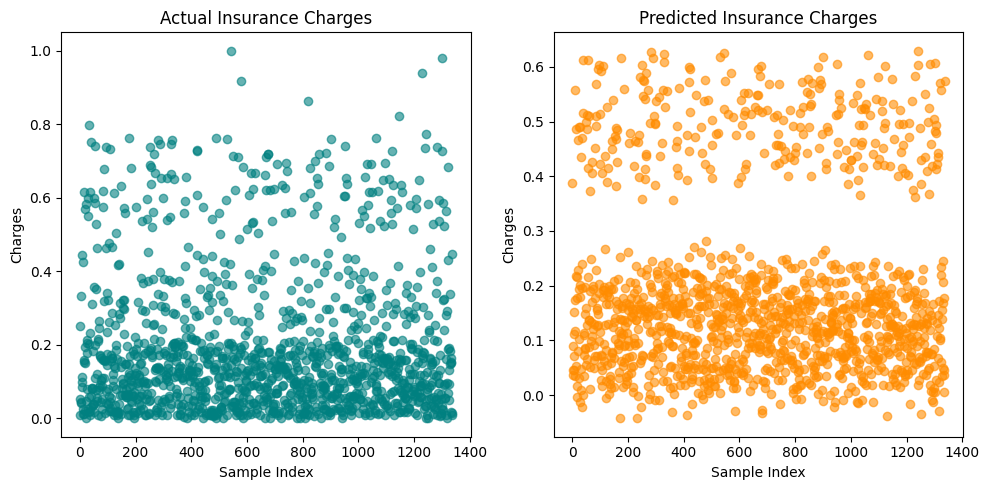

In [28]:
# Predictions and actual values already normalized or in original scale
y_pred = np.dot(x, w_final) + b_final  # or your normalized version if you're testing

plt.figure(figsize=(10,5))

# Plot 1 — Actual charges
plt.subplot(1, 2, 1)
plt.scatter(range(len(y)), y, color='teal', alpha=0.6)
plt.title("Actual Insurance Charges")
plt.xlabel("Sample Index")
plt.ylabel("Charges")

# Plot 2 — Predicted charges
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_pred)), y_pred, color='darkorange', alpha=0.6)
plt.title("Predicted Insurance Charges")
plt.xlabel("Sample Index")
plt.ylabel("Charges")

plt.tight_layout()
plt.show()


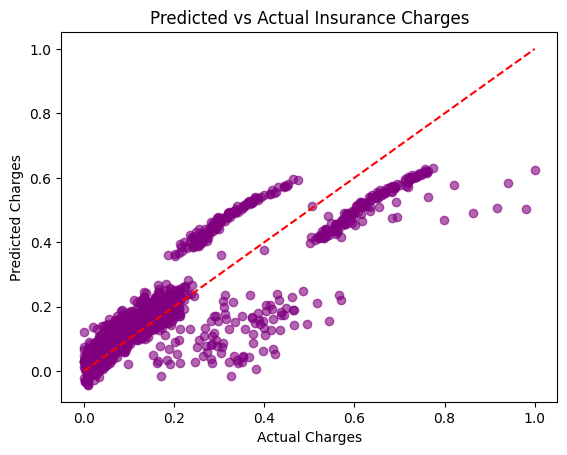

In [29]:
plt.scatter(y, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Insurance Charges")

# Add a perfect-fit line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [38]:
y_pred = np.dot(x, w_final) + b_final
mae = np.mean(np.abs(y-y_pred))

mse = np.mean((y_pred - y) ** 2)
rmse = np.sqrt(mse)

ss_res = np.sum((y-y_pred)**2)
ss_tot = np.sum(y-np.mean(y)**2)
r2 = 1- (ss_res / ss_tot)

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.940
MAE: 0.07
RMSE: 0.10
